In [14]:
import pandas as pd
from strategies import MAStrategy, LongOnlyOnce, Volatility, macd, RSI
from engine import ExecutionEngine
from PriceLoader2 import PriceLoader
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# define portfolio function 
def limited_period_total500(start_date, end_date,data_points,strategy): 
    
    engine = ExecutionEngine(data_points, strategy)
    engine.run()
    orders = engine.orders

    return orders

def build_portfolio_timeseries(orders, data_points, strategy_name, start_date, initial_capital=1_000_000):
    orders = [o for o in orders if o.strategy == strategy_name]

    all_dates = sorted(pd.to_datetime(list(data_points.keys())))
    records = []
    first_record = {"date": pd.to_datetime(start_date), "total_value": initial_capital, "cash": initial_capital}

    tickers = set(o.symbol for o in orders)
    for t in tickers:
        first_record[t] = 0.0
    records.append(first_record)

    portfolio = {"cash": initial_capital}
    for t in tickers:
        portfolio[t] = 0.0

    for dt in all_dates:
        dt_records = {"date": dt}
        for o in orders:
            if o.timestamp == dt:
                if o.action == "BUY":
                    portfolio[o.symbol] += o.quantity
                    portfolio["cash"] -= o.quantity * o.price
                elif o.action == "SELL":
                    portfolio[o.symbol] -= o.quantity
                    portfolio["cash"] += o.quantity * o.price
        total_value = portfolio["cash"]

        # mark to market valuation
        mp_list = {mp.symbol: mp.adj_close for mp in data_points[dt]}
        for sym in tickers:
            total_value += portfolio[sym] * mp_list.get(sym, 0.0)
            dt_records[sym] = portfolio[sym] * mp_list.get(sym, 0.0)
        dt_records["cash"] = portfolio["cash"]
        dt_records["total_value"] = total_value
        records.append(dt_records)

    df_ts = pd.DataFrame(records).set_index("date").sort_index()
    return df_ts

In [3]:
# given strategies
strategies = {'MA': MAStrategy(), 'LO' : LongOnlyOnce(), 'VOL':Volatility(), 'MACD' : macd(), 'RSI':RSI()}

In [ ]:
# generate orders and timeseries dataframe for given period
strategy = {'MA': MAStrategy()}
strategy_name = 'MA'
start_date="2024-08-01"
end_date="2024-12-31"
# 1. load data
price_loader = PriceLoader()
data_points = price_loader.load_data(start_date = start_date, end_date=end_date)
orders_MA = limited_period_total500(start_date, end_date, data_points, strategy)

# 2. seperate by strategy and generate trade log
df_ts = build_portfolio_timeseries(orders_MA, data_points, strategy_name, start_date, initial_capital=1000000)
df_MA = df_ts.iloc[1:]


In [ ]:
# generate orders and timeseries dataframe for given period
strategy = {'LO' : LongOnlyOnce()}
strategy_name = 'LO'
start_date="2024-08-01"
end_date="2024-12-31"
# 1. load data
price_loader = PriceLoader()
data_points = price_loader.load_data(start_date = start_date, end_date=end_date)
orders_LO = limited_period_total500(start_date, end_date, data_points, strategy)
    
# 2. seperate by strategy and generate trade log
df_ts = build_portfolio_timeseries(orders_LO, data_points, strategy_name, start_date, initial_capital=1000000)
df_LO = df_ts.iloc[1:]


In [ ]:
# generate orders and timeseries dataframe for given period
strategy = {'VOL':Volatility()}
strategy_name = 'VOL'
start_date="2024-08-01"
end_date="2024-12-31"
# 1. load data
price_loader = PriceLoader()
data_points = price_loader.load_data(start_date = start_date, end_date=end_date)
orders_VOL = limited_period_total500(start_date, end_date, data_points, strategy)
    
# 2. seperate by strategy and generate trade log
df_ts = build_portfolio_timeseries(orders_VOL, data_points, strategy_name, start_date, initial_capital=1000000)
df_VOL = df_ts.iloc[1:]

In [ ]:
# generate orders and timeseries dataframe for given period
strategy = {'MACD' : macd()}
strategy_name = 'MACD'
start_date="2024-08-01"
end_date="2024-12-31"
# 1. load data
price_loader = PriceLoader()
data_points = price_loader.load_data(start_date = start_date, end_date=end_date)
orders_MACD = limited_period_total500(start_date, end_date, data_points, strategy)
    
# 2. seperate by strategy and generate trade log
df_ts = build_portfolio_timeseries(orders_MACD, data_points, strategy_name, start_date, initial_capital=1000000)
df_MACD = df_ts.iloc[1:]


In [ ]:
# generate orders and timeseries dataframe for given period
strategy = {'RSI':RSI()}
strategy_name = 'RSI'
start_date="2024-08-01"
end_date="2024-12-31"
# 1. load data
price_loader = PriceLoader()
data_points = price_loader.load_data(start_date = start_date, end_date=end_date)
orders_RSI = limited_period_total500(start_date, end_date, data_points, strategy)
    
# 2. seperate by strategy and generate trade log
df_ts = build_portfolio_timeseries(orders_RSI, data_points, strategy_name, start_date, initial_capital=1000000)
df_RSI = df_ts.iloc[1:]

In [46]:
print(df_MA.tail())
print(orders_MA[:5])

             total_value         cash        MCHP  DPZ          EXR  \
date                                                                  
2024-12-24  1.079286e+06  1100.512621  859.204903  0.0  2170.071259   
2024-12-26  1.077645e+06  1089.826385  857.884483  0.0  2170.651932   
2024-12-27  1.069544e+06  1073.712532  855.977039  0.0  2148.742218   
2024-12-30  1.058793e+06  1063.243801  838.076935  0.0  2136.554031   
2024-12-31  1.057981e+06  1048.650035  841.451511  0.0  2170.651932   

                  INVH          AXON          APO           GE         TFC  \
date                                                                         
2024-12-24  471.895294  10100.000000  5539.186035  2556.534805  636.074524   
2024-12-26  471.311531   9980.799805  5696.603851  2566.373978  636.219120   
2024-12-27  468.538198   9775.679688  5731.560791  2539.645615  631.447449   
2024-12-30  464.597225   9669.120117  5769.506683  2510.080261  627.109509   
2024-12-31  466.640682   9509.1201

In [50]:
print(df_RSI.tail())
print(orders_RSI[:5])

             total_value           cash  APO         PSX  EXE         XOM  \
date                                                                        
2024-12-24  1.001423e+06  950214.181417  0.0  108.458206  0.0  103.530914   
2024-12-26  1.001427e+06  950214.181417  0.0  109.060852  0.0  103.618484   
2024-12-27  1.001103e+06  949991.471410  0.0  109.439941  0.0  103.608757   
2024-12-30  1.000642e+06  949991.471410  0.0  108.856720  0.0  102.908173   
2024-12-31  1.000724e+06  949734.241399  0.0  110.742447  0.0  104.669357   

            TER  EQT        EQR         IEX  ...         UHS         SHW  \
date                                         ...                           
2024-12-24  0.0  0.0  69.389290  210.011368  ...  180.623840  344.263031   
2024-12-26  0.0  0.0  69.533401  210.703888  ...  180.534134  343.259644   
2024-12-27  0.0  0.0  68.774376  208.853867  ...  179.866333  341.054108   
2024-12-30  0.0  0.0  68.370834  206.598236  ...  177.783203  336.543640   
2024

In [51]:
print(df_VOL.tail())
print(orders_VOL[:5])

             total_value           cash         REG          APO         PSX  \
date                                                                           
2024-12-24  1.015173e+06  280825.565455  289.428009  2423.393890  433.832825   
2024-12-26  1.013776e+06  281815.518874  289.855377  2416.741028  436.243408   
2024-12-27  1.006692e+06  321358.803042  287.291260  2360.054443  437.759766   
2024-12-30  9.998870e+05  378388.892901  213.895065  2142.959625  435.426880   
2024-12-31  9.976552e+05  365215.522580  287.213593  2125.585495  442.969788   

                   EXE         XOM          RSG         TER         ABT  ...  \
date                                                                     ...   
2024-12-24  664.638603  310.592743  1012.928391  647.471237  791.887283  ...   
2024-12-26  655.978592  310.855453  1012.729950  651.855469  795.406403  ...   
2024-12-27  658.774330  310.826271  1006.676407  640.396729  793.474289  ...   
2024-12-30  778.056458  308.724518   79

In [52]:
print(df_LO.tail())
print(orders_LO[:5])

             total_value           cash        REG         APO         PSX  \
date                                                                         
2024-12-24  1.005236e+06  896282.936389  72.357002  173.099564  108.458206   
2024-12-26  1.005133e+06  896282.936389  72.463844  172.624359  109.060852   
2024-12-27  1.004242e+06  896282.936389  71.822815  168.575317  109.439941   
2024-12-30  1.003123e+06  896282.936389  71.298355  164.843048  108.856720   
2024-12-31  1.003034e+06  896282.936389  71.803398  163.506577  110.742447   

                  EXE         XOM         RSG         TER         ABT  ...  \
date                                                                   ...   
2024-12-24  94.948372  103.530914  202.585678  129.494247  113.126755  ...   
2024-12-26  93.711227  103.618484  202.545990  130.371094  113.629486  ...   
2024-12-27  94.110619  103.608757  201.335281  128.079346  113.353470  ...   
2024-12-30  97.257057  102.908173  199.658142  126.245934  111.

In [53]:
print(df_MACD.tail())
print(orders_MACD[:5])

             total_value         cash   CB  INVH  AXON  APO  HSIC  \
date                                                                
2024-12-24  1.063063e+06  1973.639297  0.0   0.0   0.0  0.0   0.0   
2024-12-26  1.066632e+06  3114.637661  0.0   0.0   0.0  0.0   0.0   
2024-12-27  1.062881e+06  1467.636681  0.0   0.0   0.0  0.0   0.0   
2024-12-30  1.051856e+06  1530.635071  0.0   0.0   0.0  0.0   0.0   
2024-12-31  1.054931e+06  1082.633686  0.0   0.0   0.0  0.0   0.0   

                    AAPL          CBOE  ALL  ...  ACGL  GOOGL  BAC  PPL  \
date                                         ...                          
2024-12-24  25728.668213  77313.525391  0.0  ...   0.0    0.0  0.0  0.0   
2024-12-26  25810.372925  97705.711365  0.0  ...   0.0    0.0  0.0  0.0   
2024-12-27  25468.588257  78434.991455  0.0  ...   0.0    0.0  0.0  0.0   
2024-12-30  25130.787659  58438.499451  0.0  ...   0.0    0.0  0.0  0.0   
2024-12-31  24953.417969  38853.613281  0.0  ...   0.0    0.0  0.0

<Figure size 1500x600 with 0 Axes>

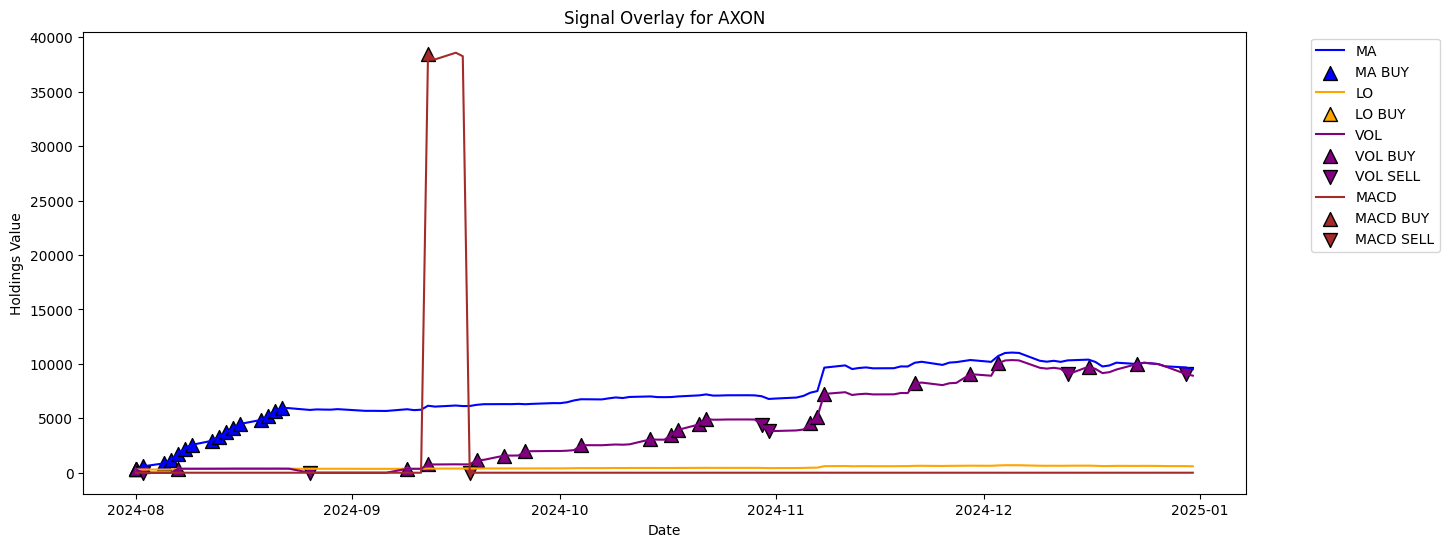

In [61]:
import matplotlib.pyplot as plt

dfs = [df_MA, df_LO, df_RSI, df_VOL, df_MACD]
orders_list = [orders_MA, orders_LO, orders_RSI, orders_VOL, orders_MACD]
strategy_names = ['MA', 'LO', 'RSI', 'VOL', 'MACD']
colors = ["blue", "orange", "green", "purple", "brown"]  # 전략별 색상

ticker = "AXON"

plt.figure(figsize=(15,6))
plt.figure(figsize=(15,6))

for df, orders, name, color in zip(dfs, orders_list, strategy_names, colors):
    if ticker in df.columns:
        plt.plot(df.index, df[ticker], label=f"{name}", color=color)

        # BUY / SELL 라벨 한 번만 추가하기 위한 플래그
        added_buy, added_sell = False, False

        for o in orders:
            if o.symbol == ticker:
                y_val = df.loc[o.timestamp, ticker]
                if o.action == "BUY":
                    plt.scatter(o.timestamp, y_val, marker="^", color=color,
                                edgecolor="black", s=100,
                                label=f"{name} BUY" if not added_buy else "")
                    added_buy = True
                elif o.action == "SELL":
                    plt.scatter(o.timestamp, y_val, marker="v", color=color,
                                edgecolor="black", s=100,
                                label=f"{name} SELL" if not added_sell else "")
                    added_sell = True

plt.title(f"Signal Overlay for {ticker}")
plt.xlabel("Date")
plt.ylabel("Holdings Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 오른쪽 바깥에 정리
plt.show()


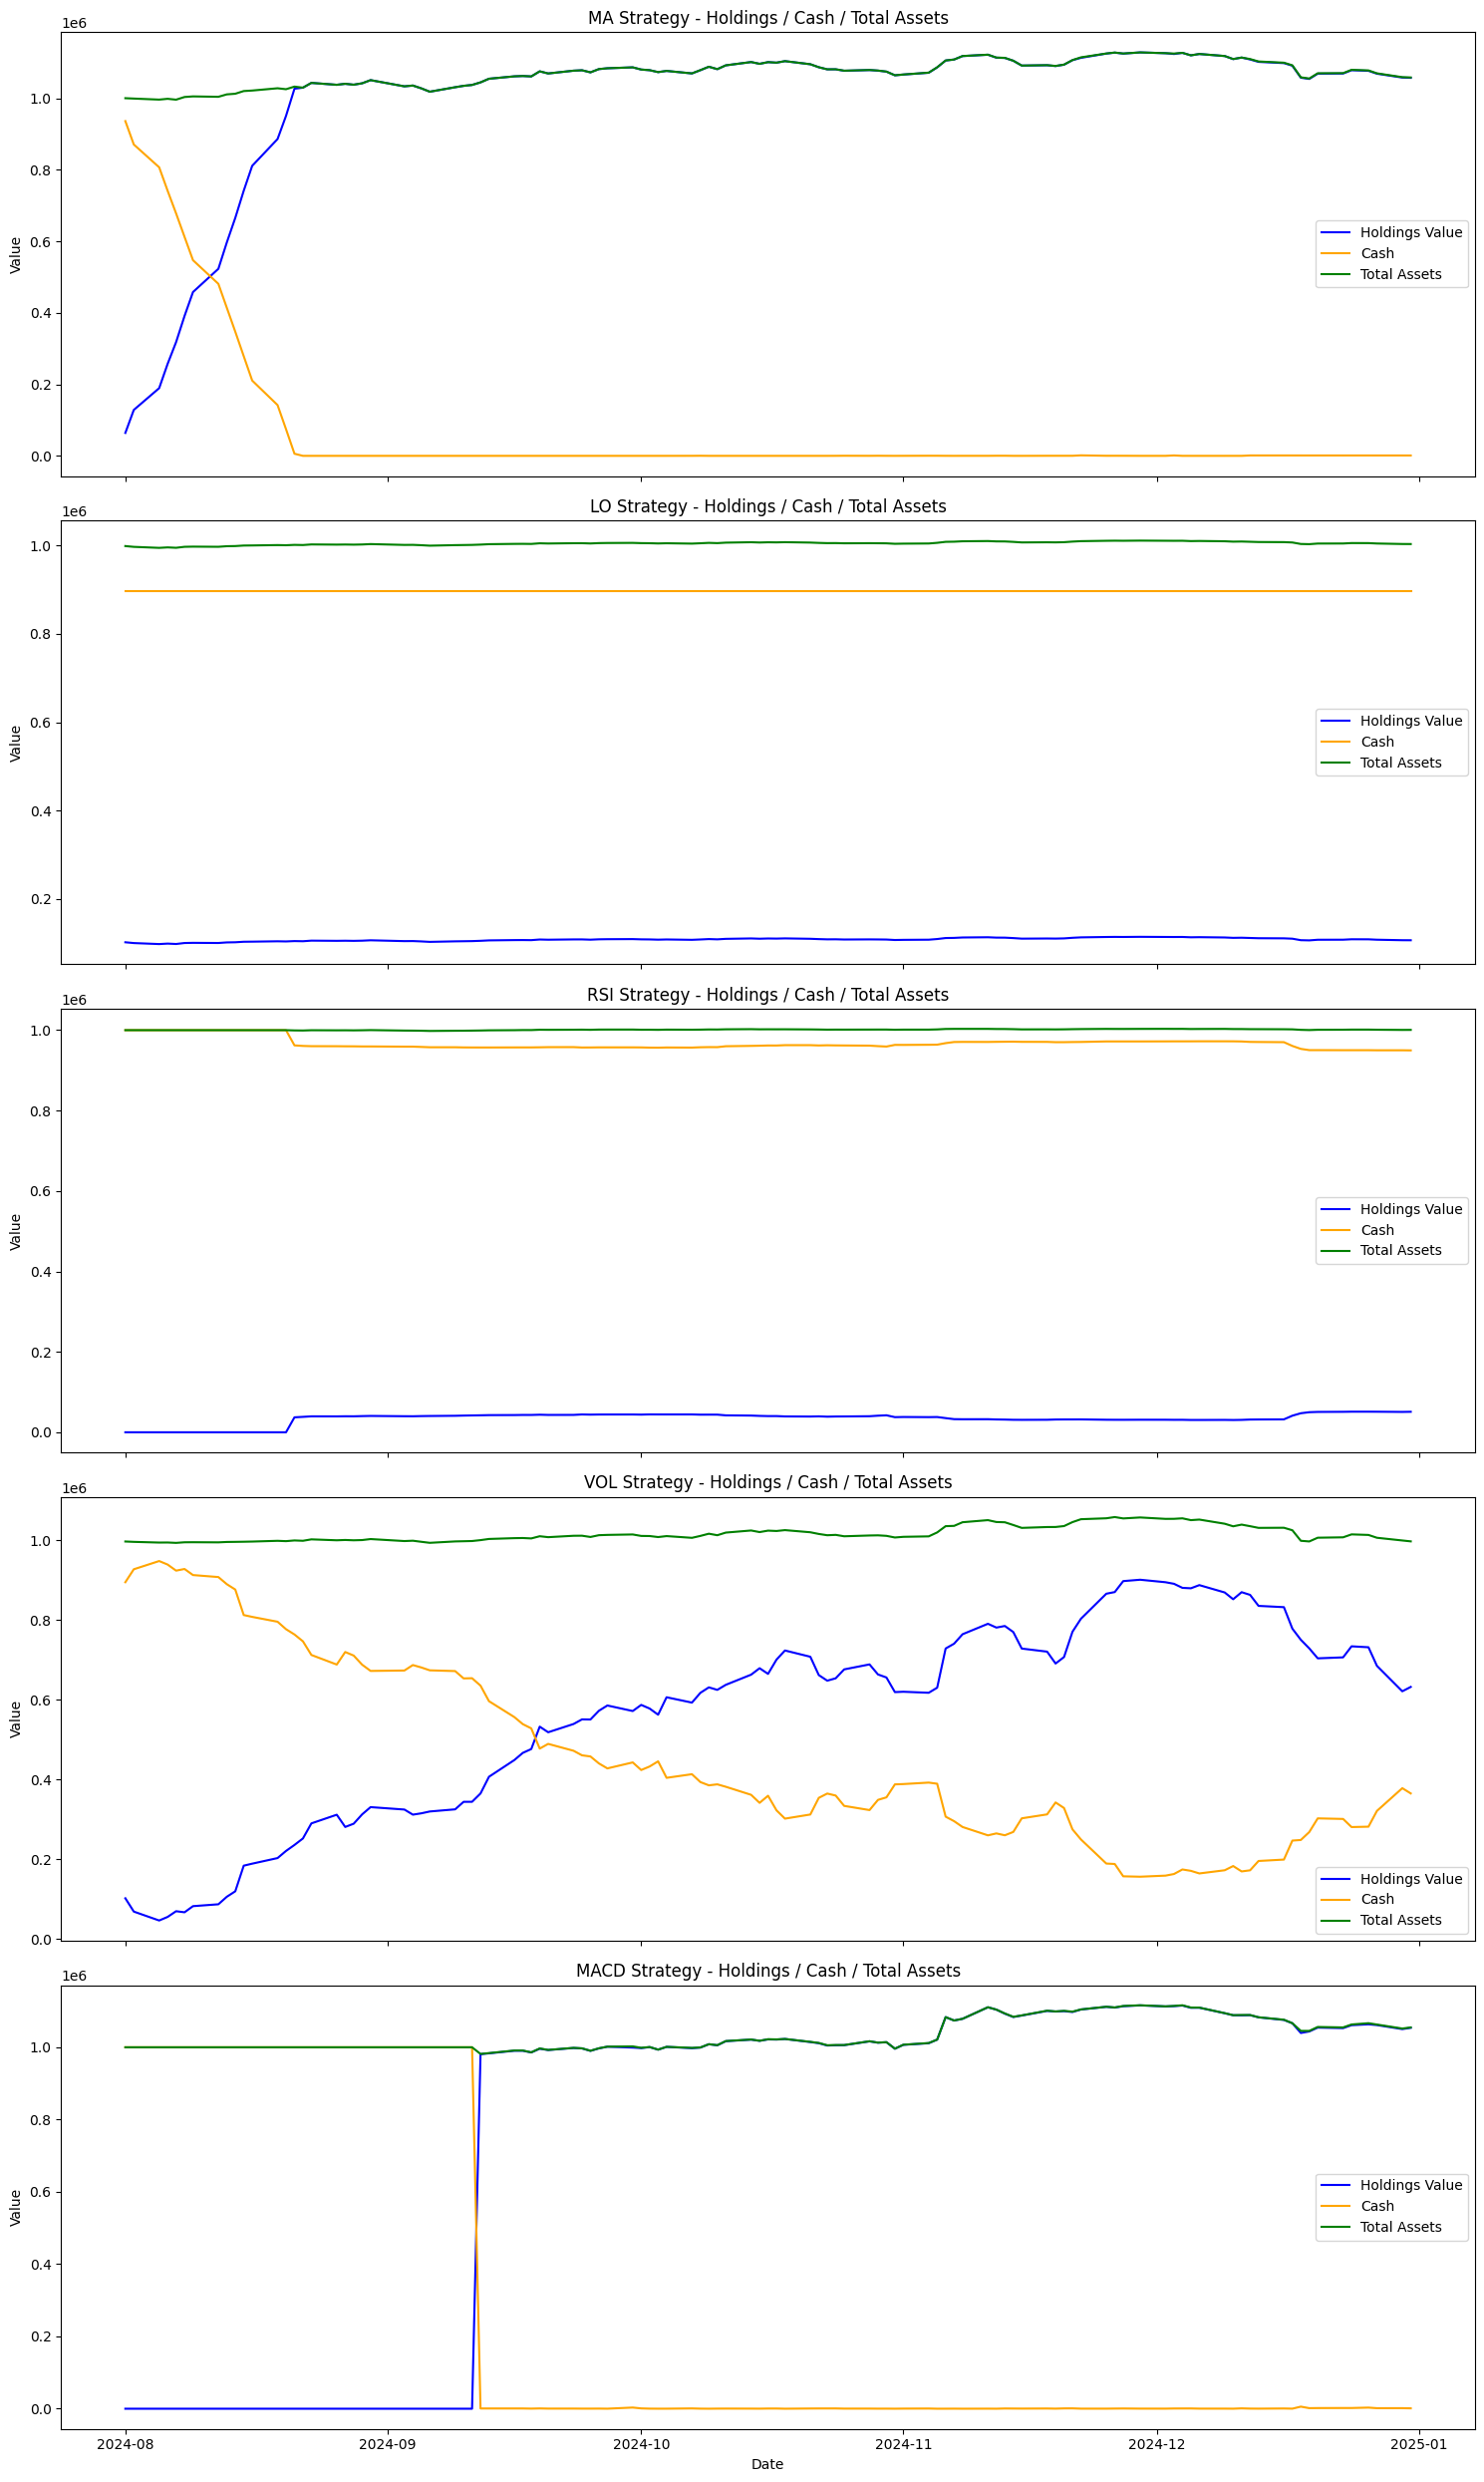

In [62]:
dfs = [df_MA, df_LO, df_RSI, df_VOL, df_MACD]
strategy_names = ['MA', 'LO', 'RSI', 'VOL', 'MACD']

fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

for ax, df, name in zip(axes, dfs, strategy_names):
    # 총 보유 가치 (개별 종목 합산)
    holdings = df.drop(columns=["cash", "total_value"]).sum(axis=1)

    ax.plot(df.index, holdings, label="Holdings Value", color="blue")
    ax.plot(df.index, df["cash"], label="Cash", color="orange")
    ax.plot(df.index, df["total_value"], label="Total Assets", color="green")

    ax.set_title(f"{name} Strategy - Holdings / Cash / Total Assets")
    ax.set_ylabel("Value")
    ax.legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()


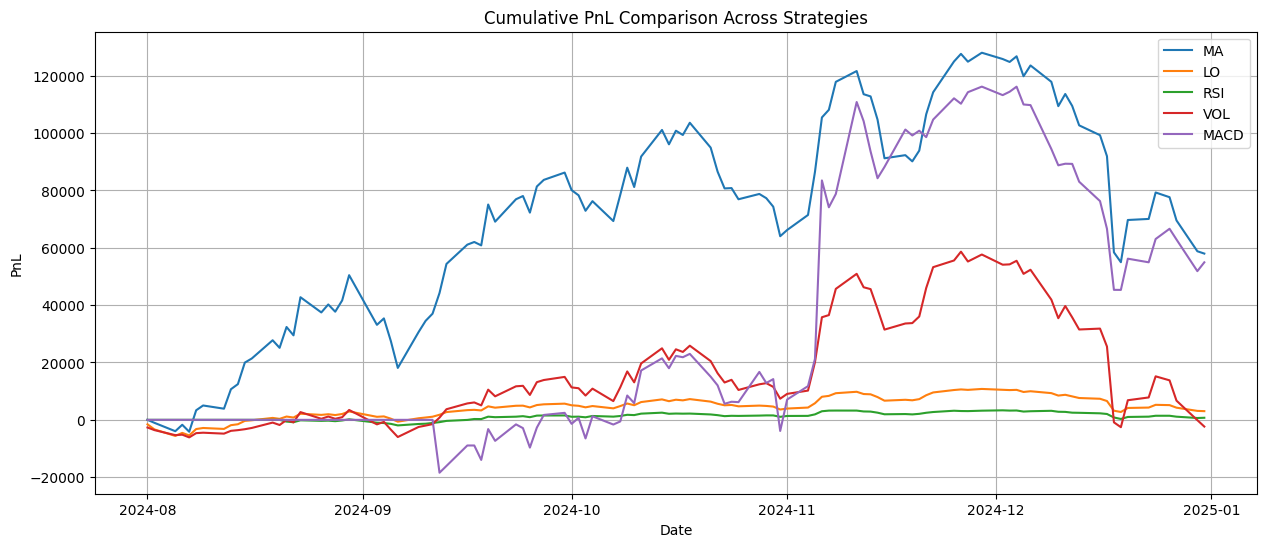

In [63]:
dfs = [df_MA, df_LO, df_RSI, df_VOL, df_MACD]
strategy_names = ['MA', 'LO', 'RSI', 'VOL', 'MACD']

plt.figure(figsize=(15,6))

initial_capital = 1_000_000

for df, name in zip(dfs, strategy_names):
    cumulative_pnl = df["total_value"] - initial_capital
    plt.plot(df.index, cumulative_pnl, label=name)

plt.title("Cumulative PnL Comparison Across Strategies")
plt.xlabel("Date")
plt.ylabel("PnL")
plt.legend()
plt.grid(True)
plt.show()


# Strategy Performance Summary

| Strategy | Portfolio / Cash / Total Assets | Cumulative PnL | Single Stock AXON Signals |
|----------|--------------------------------|----------------|---------------------------|
| **MA** | Initial aggressive cash outflow; holdings increase; total assets stable | Highest cumulative PnL; best overall performance | Many BUY signals early; holdings stabilize afterward |
| **LO** | Very stable cash and holdings; passive strategy | Nearly flat; low activity and returns | Few to no signals; passive strategy |
| **RSI** | Minor changes in holdings and cash; few trades executed | Around zero; few profitable trades | Few signals; minimal trading |
| **VOL** | Holdings and cash fluctuate inversely; reacts dynamically to volatility | Medium PnL with high fluctuations; timing-dependent | Frequent BUY/SELL signals; positions fluctuate significantly |
| **MACD** | Cash almost fully invested initially; trades adjust holdings; total assets grow long-term | Second highest cumulative PnL; active trading | Clear BUY/SELL signals; positions change strongly; fewer but impactful |
